1. Perform linear regression to predict
CO2 Emission Dataset: fuel_consumption_dataset.csv
Evaluate the quality of the models by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks.

### Summary of the Code:

---

### 1. **Import Required Libraries**
The code begins by importing the necessary libraries for:
- Data manipulation (`pandas`, `numpy`).
- Visualization (`matplotlib`, `seaborn`).
- Machine learning tasks (`sklearn`).



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler



---

### 2. **Load the Dataset**
The dataset (`fuel_consumption_dataset.csv`) is loaded into a Pandas DataFrame.



In [39]:
df = pd.read_csv('fuel_consumption_dataset.csv')



---

### 3. **Clean Missing Data**
- Replace `?` with `NaN` to mark missing values.
- Drop rows with missing values.



In [40]:
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)



---

### 4. **Encode Categorical Columns**
Categorical columns (e.g., `MAKE`, `MODEL`, `VEHICLECLASS`, etc.) are converted into numeric values using `LabelEncoder`.



In [41]:
ld = LabelEncoder()
df['MAKE'] = ld.fit_transform(df['MAKE'])
df['MODEL'] = ld.fit_transform(df['MODEL'])
df['VEHICLECLASS'] = ld.fit_transform(df['VEHICLECLASS'])
df['TRANSMISSION'] = ld.fit_transform(df['TRANSMISSION'])
df['FUELTYPE'] = ld.fit_transform(df['FUELTYPE'])



---

### 5. **Visualize Correlations**
- Compute the correlation matrix to analyze relationships between features.
- Plot a heatmap to visualize the correlations.



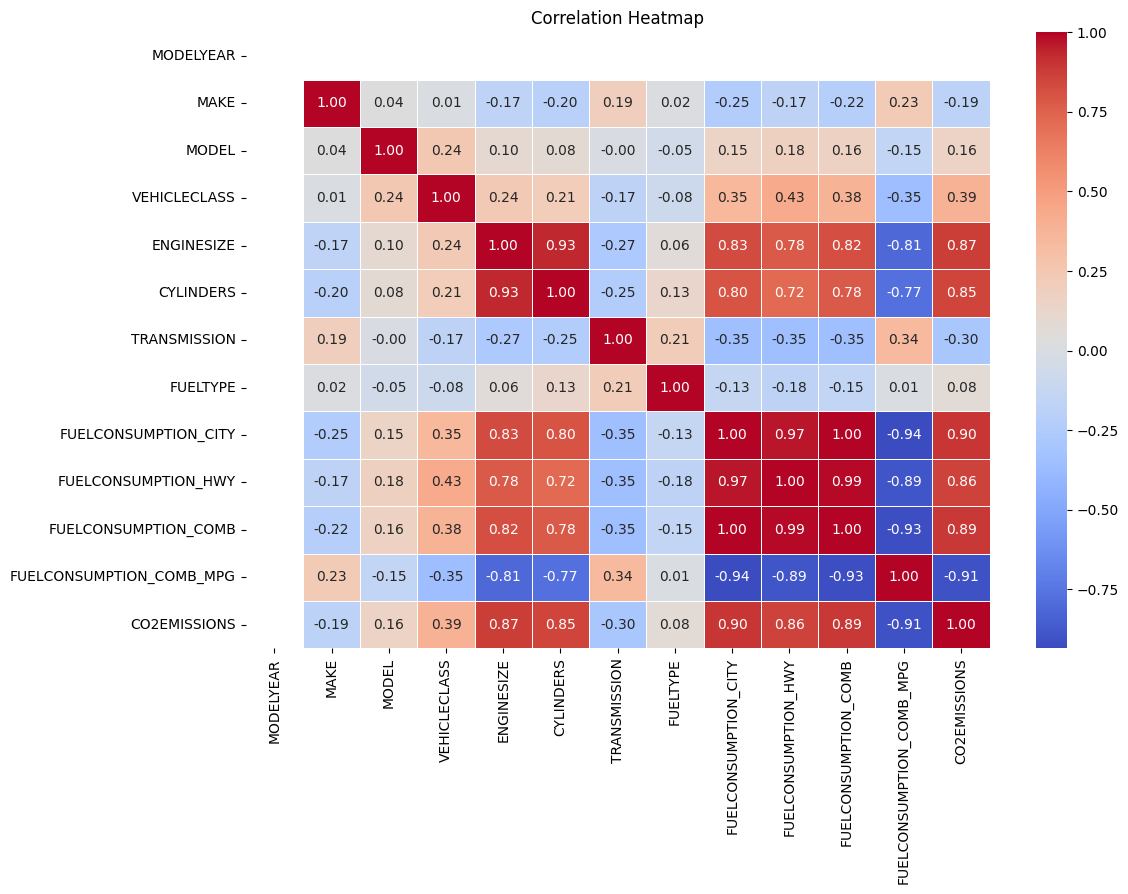

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



---

### 6. **Filter Correlations by Threshold**
- Set a threshold (e.g., `0.5`) to filter highly correlated features.
- Extract and print feature pairs with high correlations.



In [43]:
threshold = 0.5
filtered_corr = correlation_matrix[(correlation_matrix >= threshold)]
high_corr_features = []
for col in filtered_corr.columns:
    for row in filtered_corr.index:
        if row != col and abs(filtered_corr.loc[row, col]) >= threshold:
            high_corr_features.append((row, col, filtered_corr.loc[row, col]))



---

### 7. **Extract Unique Features**
- Remove duplicate feature pairs (e.g., `(A, B)` and `(B, A)`).
- Separate the last column as the target variable (`feature_output`).
- Include other features in the list of highly correlated features.



In [44]:
unique_high_corr_features = list(set(tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_features))
unique_features = list(set([feature for pair in unique_high_corr_features for feature in pair[:2]]))
feature_output = df.columns[-1]
unique_features.remove(feature_output)

print("\nHighly correlated features (excluding output feature):")
print(unique_features)
print("\nOutput feature:")
print(feature_output)


Highly correlated features (excluding output feature):
['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_HWY']

Output feature:
CO2EMISSIONS




---

### 8. **Prepare Features and Target**
- Separate the dataset into features (`X`) and the target variable (`y`).
- Use all features or only the selected features for training.



In [45]:
X_sel = df[unique_features]
y_sel = df[feature_output]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]



---

### 9. **Split Data into Training and Testing Sets**
Split the data into training (80%) and testing (20%) sets.



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.2, random_state=42)



---

### 10. **Train the Linear Regression Model**
Train two linear regression models:
1. Using all features.
2. Using only the selected features.



In [47]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train_sel, y_train_sel)

LinearRegression()



---

### 11. **Make Predictions**
Use the trained models to predict the target variable for the test data.



In [48]:
y_pred = model1.predict(X_test)
y_pred_sel = model2.predict(X_test_sel)



---

### 12. **Evaluate the Models**
Evaluate the models' performance using:
- **R² Score**: Measures how well the model explains the variance in the target variable.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.



In [49]:
print("\nUsing all features:")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

print("\nUsing selected features:")
r2_sel = r2_score(y_test_sel, y_pred_sel)
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
print(f"R² Score: {r2_sel:.4f}")
print(f"Mean Squared Error: {mse_sel:.4f}")


Using all features:
R² Score: 0.9188
Mean Squared Error: 335.6547

Using selected features:
R² Score: 0.8763
Mean Squared Error: 511.3652




---

### 13. **Visualize Actual vs Predicted Values**
Plot scatter plots to compare the actual and predicted values for both models.



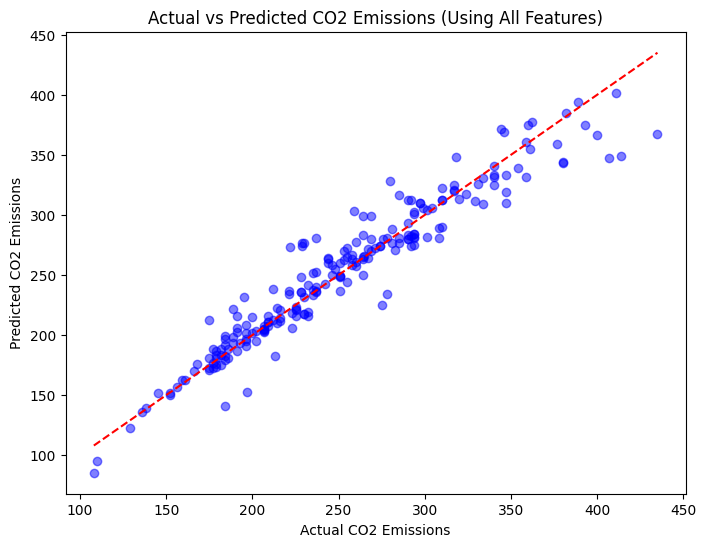

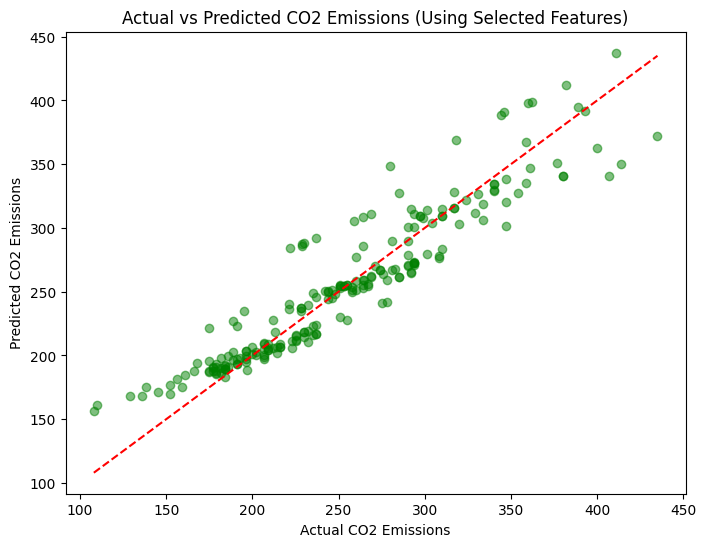

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Using All Features)")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_sel, y_pred_sel, color='green', alpha=0.5)
plt.plot([y_test_sel.min(), y_test_sel.max()], [y_test_sel.min(), y_test_sel.max()], color='red', linestyle='dashed')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Using Selected Features)")
plt.show()



---

### Summary:
1. Load and clean the dataset.
2. Encode categorical columns.
3. Visualize correlations and filter features based on a threshold.
4. Extract unique features and separate the target variable.
5. Split the data into training and testing sets.
6. Train two linear regression models (all features vs. selected features).
7. Evaluate the models using R² and MSE.
8. Visualize the models' predictions against actual values.